# Análise de sentimentos do Twitter com dados extraidor do dataset anotado tweetSentBR

O trabalho será realizando apenas com os dados originail desbalanceados

### Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os dados para treinamento do modelo

In [2]:
# carregando dataset
tweets_df = pd.read_csv('')

In [3]:
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,que coisa linda O programa estava mostrando um...,False
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,por mais com as irmãs galvão adorei elas,False
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,1,test,mr CATRA USERNAME lançando sua nova música PPK...,False
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,0,test,quem viu aquela lutadora modela barbuda tatuad...,False
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,-1,test,tô passada com esse cara quanta merda pode sai...,False


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         15047 non-null  int64 
 1   hashtag    15047 non-null  object
 2   votes      15047 non-null  object
 3   hard       15047 non-null  int64 
 4   sentiment  15047 non-null  object
 5   group      15047 non-null  object
 6   text       15047 non-null  object
 7   repeat     15047 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 837.7+ KB


In [5]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
-,47,47,47,47,47,47,47
-1,4426,4426,4426,4426,4426,4426,4426
0,3926,3926,3926,3926,3926,3926,3926
1,6648,6648,6648,6648,6648,6648,6648


Como podemos observar, os dados estão desbalanceados e com algumas linhas apresentando a variável sentimento com o caracter traço '-'.

Para melhor trabalharmos com os dados, foi decidida a remoção dessas linhas.

In [6]:
# removendo as linhas com a variável sentimento como traço '-'

indexNames = tweets_df[ tweets_df['sentiment'] == '-' ].index #obtendo o valor para ajudar a remover a linha
tweets_df.drop(indexNames , inplace=True) #removendo a linha correspondente ao valor informado

In [7]:
# tranformando valores para adequar a os classificadores
tweets_df['sentiment'] = tweets_df['sentiment'].replace(['-1', '0', '1'], [3, 6, 9])
tweets_df['sentiment'] = tweets_df['sentiment'].replace([3, 6, 9], [0, 1, 2])

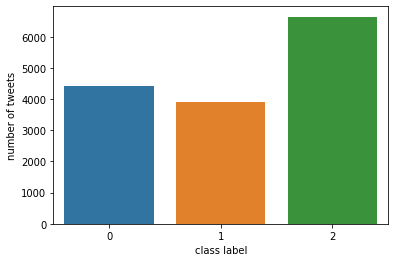

In [8]:
# Visualizando os dados graficamente
sns.countplot(x=tweets_df.sentiment)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

In [9]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
0,4426,4426,4426,4426,4426,4426,4426
1,3926,3926,3926,3926,3926,3926,3926
2,6648,6648,6648,6648,6648,6648,6648


## Efetuando a limpeza dos dados

In [10]:
# removendo as palavras USERNAME e NUMBER
tweets_df['text_clean'] = tweets_df['text'].str.replace('USERNAME', '').str.replace('NUMBER', '')

In [11]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# importando a biblioteca de processamento de linguagen natural e a de expreções regulares (regex)
import nltk
import re

# usando as funções stopword e remover os caracteres indesejados
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower() # remove url e tranforma o texto em minusculo
    instancia = re.sub(r'[0-9]+', '', instancia) # remove números
    instancia = re.sub(r'[^\w\s]','', instancia) # remove pontuação
    instancia = re.sub('[!#$%^&*()]', '', instancia) #remove caractéres espaciais
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [13]:
# remover emojis utilizado regex (re)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [14]:
# aplicando a função de limpeza de dados:
tweets_df['text_clean'] = [Preprocessing(i) for i in tweets_df['text_clean']]
tweets_df['text_clean'] = [remove_emoji(i) for i in tweets_df['text_clean']]
pd.set_option('display.max_colwidth', None) 

tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,length_tweet
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,67
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,19
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,48
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,65


# Lematização

In [15]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-07-13 15:59:27.494600: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 71.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [16]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [17]:
tweets_df['text_lemma'] = tweets_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [18]:
tweets_df['text_lemma'] = [Preprocessing(i) for i in tweets_df['text_lemma']]
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,length_tweet,text_lemma
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,67,coisa lindo programa mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,19,irmã galvão ador
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,48,ver lutadora modelar barbuda tatuar masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,65,tô passado cara quanto merdo poder sair boca alguém algum minuto


## Lematização (outra forma)

In [19]:
!pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 8.4 MB/s eta 0:00:00


In [20]:
import simplemma
from simplemma import text_lemmatizer

In [21]:
# teste
teste_lemma = text_lemmatizer('Sou o intervalo entre o que desejo ser e os outros me fizeram.', lang='pt')
teste_lemma

['ser',
 'o',
 'intervalo',
 'entre',
 'o',
 'que',
 'desejo',
 'ser',
 'e',
 'o',
 'outro',
 'me',
 'fazer',
 '.']

In [22]:
tweets_df['text_lemma_2'] = [text_lemmatizer(linha, lang='pt') for linha in tweets_df['text_clean']] #lematizando o texto
tweets_df['text_lemma_2'] = [' '.join(palavra) for palavra in tweets_df['text_lemma_2']] #juntando o texto novamente
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,length_tweet,text_lemma,text_lemma_2
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,67,coisa lindo programa mostrar familia adotar adolescente ano amor,coisar lindar programar mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,19,irmã galvão ador,irmão galvão adorar
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora,mr catra lançar novo músico ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,48,ver lutadora modelar barbuda tatuar masterchefbr,ver lutador modelar barbudo tatuado masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,65,tô passado cara quanto merdo poder sair boca alguém algum minuto,tô passado caro quanto merda poder sair bocar alguém algum minuto


# Machine Learning - Utils

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Vetorizadores
from sklearn.feature_extraction.text import CountVectorizer

# Classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict

In [24]:
# Tokenização especial para tweets
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [25]:
# função para escolher os pipelines dos modelos a serem treinados
def escolher_pipeline(pipe):
    
    if(pipe == 1):
        modelo_sgd_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(alpha=0.0001,
                                     loss='modified_huber', 
                                     penalty ='l2'))
        ])
        return modelo_sgd_tfidf
    
    elif(pipe == 2):
        modelo_nb_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MultinomialNB(alpha=0.1))
        ])
        return modelo_nb_tfidf
    
    elif(pipe == 3):
        modelo_rf_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier(n_estimators=10))
        ])
        return modelo_rf_tfidf
    
    elif(pipe == 4):
        modelo_knn_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', KNeighborsClassifier(metric='euclidean', 
                                            n_neighbors=1, 
                                            weights='uniform'))
        ])
        return modelo_knn_tfidf
    
    elif(pipe == 5):
        modelo_pa_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier(C= 0.03, 
                                                   loss= 'squared_hinge'))
        ])
        return modelo_pa_tfidf
    
    elif(pipe == 6):
        modelo_gb_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', GradientBoostingClassifier(criterion='friedman_mse', 
                                                  learning_rate=0.2, 
                                                  max_depth=8, 
                                                  max_features='sqrt', 
                                                  n_estimators=10))
        ])
        return modelo_gb_tfidf
    
    elif(pipe == 7):
        modelo_xgb_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', xgb.XGBClassifier(learning_rate=0.5, 
                                         max_depth=4, 
                                         objective='binary=hinge'))
        ])
        return modelo_xgb_tfidf
    
    elif(pipe == 8):
        modelo_mlp_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MLPClassifier(activation='relu', 
                                     alpha=0.05, 
                                     hidden_layer_sizes=(50, 100, 50), 
                                     learning_rate='constant', 
                                     solver='adam'))
        ])
        return modelo_mlp_tfidf
    
    elif(pipe == 9):
        modelo_lr_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(C= 100.0, 
                                          penalty= 'l2'))
        ])
        return modelo_lr_tfidf
    
    elif(pipe == 10):
        modelo_svc_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC(C=10, 
                           gamma=1, 
                           kernel='rbf'))
        ])
        return modelo_svc_tfidf

In [26]:
!pip install confplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    # plotar a matrix de confusão (mais completo)
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

# Machine Learning - Construindo modelo com dados originais

In [28]:
X = tweets_df['text_lemma_2']
y = tweets_df['sentiment']

In [29]:
X.shape, y.shape

((15000,), (15000,))

### Separando dados para o treino e para o teste

In [30]:
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, y_train.shape, X_text.shape, y_test.shape

((11250,), (11250,), (3750,), (3750,))

## Modelo 1 (CountVectorizer e SGDClassifier)

In [31]:
modelo1_orig = escolher_pipeline(1)
modelo1_orig = modelo1_orig.fit(X_train, y_train)
modelo1_pred_orig = modelo1_orig.predict(X_text)

In [32]:
modelo1_pred_orig

array([2, 0, 2, ..., 2, 1, 0])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58      1145
           1       0.42      0.43      0.42       967
           2       0.68      0.72      0.70      1638

    accuracy                           0.60      3750
   macro avg       0.57      0.57      0.57      3750
weighted avg       0.60      0.60      0.60      3750

Acurácia: 0.5965

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         639  292   214  1145
1         223  412   332   967
2         179  273  1186  1638
All      1041  977  1732  3750 


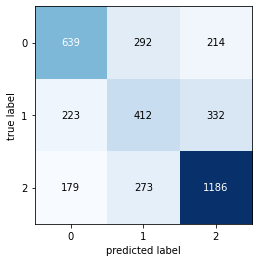

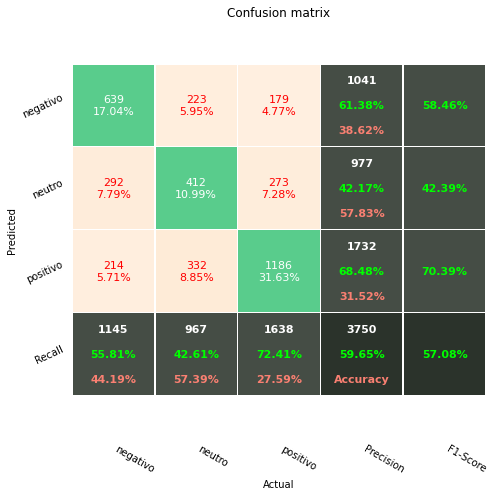

In [33]:
matriz_confusao(y_test, modelo1_pred_orig)

### Validação cruzada - modelo 1

In [34]:
validacao_cruzada1 = cross_val_predict(modelo1_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61      4426
           1       0.48      0.42      0.45      3926
           2       0.68      0.74      0.71      6648

    accuracy                           0.62     15000
   macro avg       0.59      0.59      0.59     15000
weighted avg       0.61      0.62      0.61     15000

Acurácia: 0.6167

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2658   850   918   4426
1         902  1643  1381   3926
2         739   960  4949   6648
All      4299  3453  7248  15000 


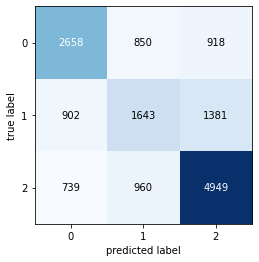

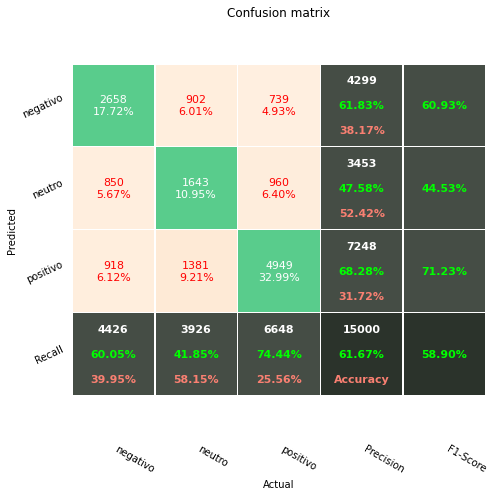

In [35]:
matriz_confusao(y, validacao_cruzada1)

## Modelo 2 (CountVectorizer e MultinomialNB)

In [36]:
modelo2_orig = escolher_pipeline(2)
modelo2_orig = modelo2_orig.fit(X_train, y_train)
modelo2_pred_orig = modelo2_orig.predict(X_text)

In [37]:
modelo2_pred_orig

array([0, 0, 2, ..., 2, 1, 2])

### Avaliando o modelo 2

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62      1145
           1       0.47      0.33      0.39       967
           2       0.67      0.75      0.71      1638

    accuracy                           0.61      3750
   macro avg       0.58      0.58      0.57      3750
weighted avg       0.60      0.61      0.60      3750

Acurácia: 0.6099

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         739  176   230  1145
1         282  320   365   967
2         229  181  1228  1638
All      1250  677  1823  3750 


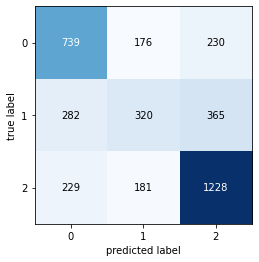

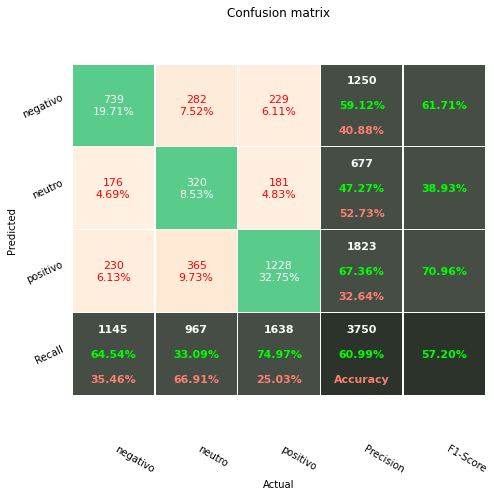

In [38]:
matriz_confusao(y_test, modelo2_pred_orig)

### Validação cruzada - modelo 2

In [39]:
validacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62      4426
           1       0.49      0.35      0.41      3926
           2       0.69      0.75      0.72      6648

    accuracy                           0.62     15000
   macro avg       0.59      0.59      0.58     15000
weighted avg       0.61      0.62      0.61     15000

Acurácia: 0.6191

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2888   685   853   4426
1        1096  1389  1441   3926
2         892   747  5009   6648
All      4876  2821  7303  15000 


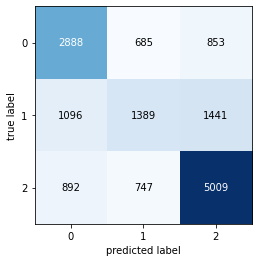

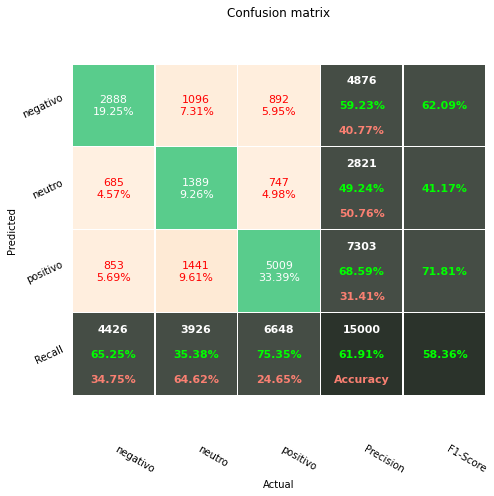

In [40]:
matriz_confusao(y, validacao_cruzada2)

## Modelo 3 (CountVectorizer e RandomForestClassifier)

In [41]:
modelo3_orig = escolher_pipeline(3)
modelo3_orig = modelo3_orig.fit(X_train, y_train)
modelo3_pred_orig = modelo3_orig.predict(X_text)

In [42]:
modelo3_pred_orig

array([0, 1, 2, ..., 2, 1, 2])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.58      0.59      1145
           1       0.45      0.50      0.48       967
           2       0.68      0.66      0.67      1638

    accuracy                           0.59      3750
   macro avg       0.58      0.58      0.58      3750
weighted avg       0.60      0.59      0.60      3750

Acurácia: 0.5941

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         661   249   235  1145
1         212   487   268   967
2         212   346  1080  1638
All      1085  1082  1583  3750 


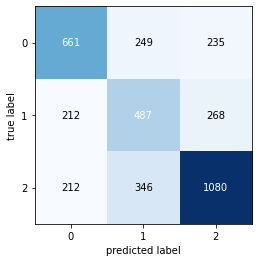

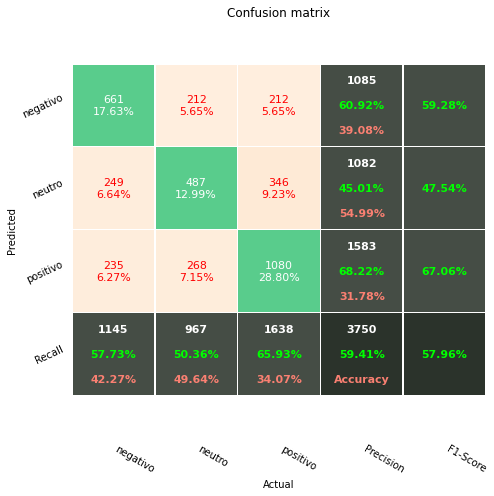

In [43]:
matriz_confusao(y_test, modelo3_pred_orig)

### Validação cruzada - modelo 3

In [44]:
validacao_cruzada3 = cross_val_predict(modelo3_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.59      0.56      0.57      4426
           1       0.44      0.46      0.45      3926
           2       0.68      0.68      0.68      6648

    accuracy                           0.59     15000
   macro avg       0.57      0.57      0.57     15000
weighted avg       0.59      0.59      0.59     15000

Acurácia: 0.5876

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2463  1005   958   4426
1         884  1817  1225   3926
2         846  1268  4534   6648
All      4193  4090  6717  15000 


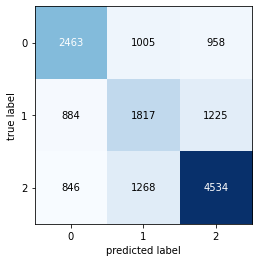

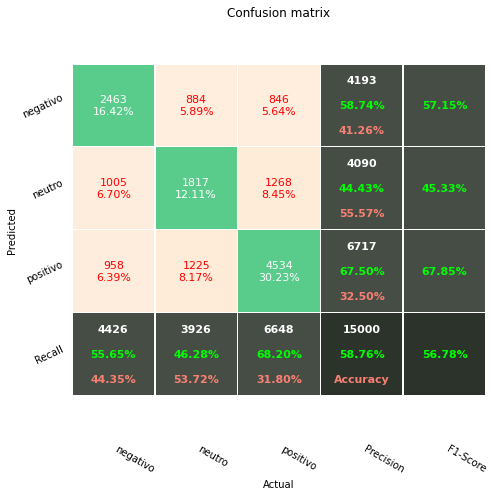

In [45]:
matriz_confusao(y, validacao_cruzada3)

## Modelo 4 (CountVectorizer e KNeighborsClassifier)

In [46]:
modelo4_orig = escolher_pipeline(4)
modelo4_orig = modelo4_orig.fit(X_train, y_train)
modelo4_pred_orig = modelo4_orig.predict(X_text)

In [47]:
modelo4_pred_orig

array([0, 1, 2, ..., 1, 2, 2])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.59      0.34      0.43      1145
           1       0.36      0.40      0.38       967
           2       0.55      0.68      0.61      1638

    accuracy                           0.50      3750
   macro avg       0.50      0.47      0.47      3750
weighted avg       0.51      0.50      0.49      3750

Acurácia: 0.5019

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        384   305   456  1145
1        124   388   455   967
2        139   389  1110  1638
All      647  1082  2021  3750 


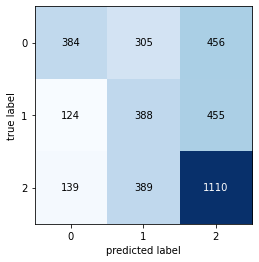

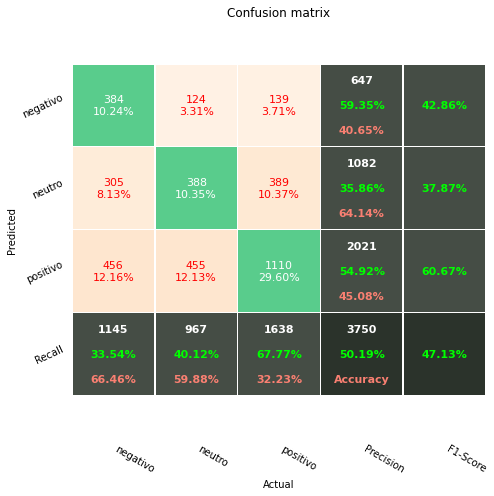

In [48]:
matriz_confusao(y_test, modelo4_pred_orig)

### Validação cruzada - modelo 4

In [49]:
validacao_cruzada4 = cross_val_predict(modelo4_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.55      0.30      0.39      4426
           1       0.35      0.47      0.40      3926
           2       0.57      0.63      0.60      6648

    accuracy                           0.49     15000
   macro avg       0.49      0.47      0.46     15000
weighted avg       0.51      0.49      0.49     15000

Acurácia: 0.4917

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        1328  1557  1541   4426
1         490  1852  1584   3926
2         586  1866  4196   6648
All      2404  5275  7321  15000 


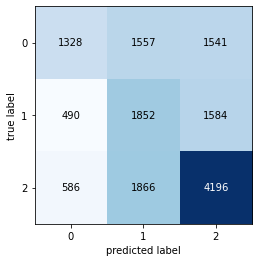

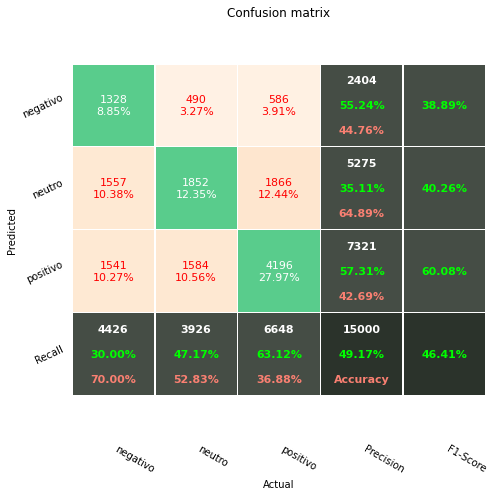

In [50]:
matriz_confusao(y, validacao_cruzada4)

## Modelo 5 (CountVectorizer e PassiveAggressiveClassifier)

In [51]:
modelo5_orig = escolher_pipeline(5)
modelo5_orig = modelo5_orig.fit(X_train, y_train)
modelo5_pred_orig = modelo5_orig.predict(X_text)

In [52]:
modelo5_pred_orig

array([2, 0, 2, ..., 2, 1, 0])

### Avaliando o modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.56      0.59      1145
           1       0.42      0.45      0.44       967
           2       0.69      0.71      0.70      1638

    accuracy                           0.60      3750
   macro avg       0.58      0.57      0.57      3750
weighted avg       0.60      0.60      0.60      3750

Acurácia: 0.5963

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         638   301   206  1145
1         211   433   323   967
2         185   288  1165  1638
All      1034  1022  1694  3750 


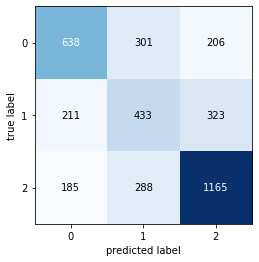

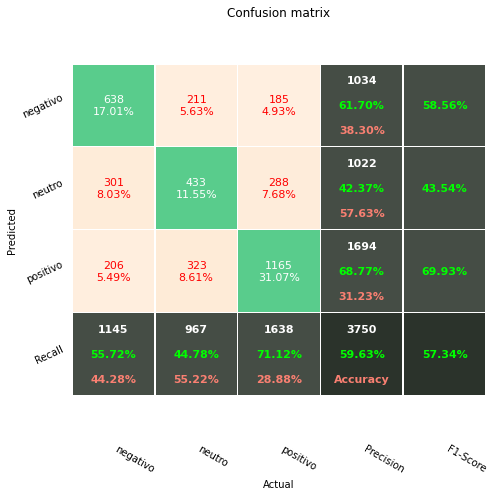

In [53]:
matriz_confusao(y_test, modelo5_pred_orig)

### Validação cruzada - modelo 5

In [54]:
validacao_cruzada5 = cross_val_predict(modelo5_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.59      0.60      4426
           1       0.46      0.46      0.46      3926
           2       0.69      0.71      0.70      6648

    accuracy                           0.61     15000
   macro avg       0.59      0.58      0.58     15000
weighted avg       0.61      0.61      0.61     15000

Acurácia: 0.6061

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2593   963   870   4426
1         874  1792  1260   3926
2         767  1175  4706   6648
All      4234  3930  6836  15000 


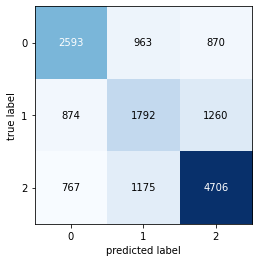

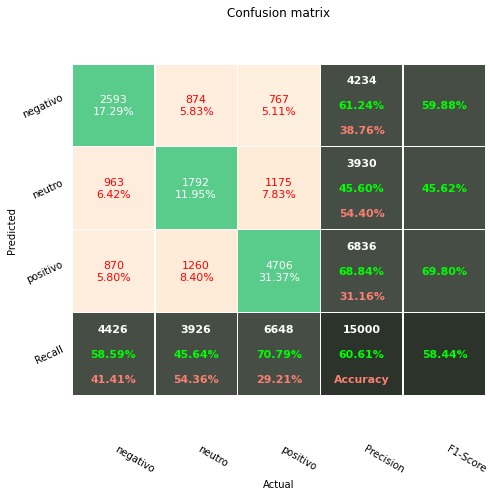

In [55]:
matriz_confusao(y, validacao_cruzada5)

## Modelo 6 (CountVectorizer e GradientBoostingClassifier)

In [56]:
modelo6_orig = escolher_pipeline(6)
modelo6_orig = modelo6_orig.fit(X_train, y_train)
modelo6_pred_orig = modelo6_orig.predict(X_text)

In [57]:
modelo6_pred_orig

array([2, 2, 2, ..., 2, 2, 2])

### Avaliando o modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.18      0.29      1145
           1       0.85      0.05      0.10       967
           2       0.47      0.98      0.64      1638

    accuracy                           0.50      3750
   macro avg       0.69      0.41      0.34      3750
weighted avg       0.65      0.50      0.39      3750

Acurácia: 0.4992

Matrix de confusão:
 Predito    0   1     2   All
Real                        
0        210   7   928  1145
1         47  52   868   967
2         26   2  1610  1638
All      283  61  3406  3750 


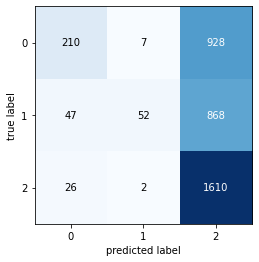

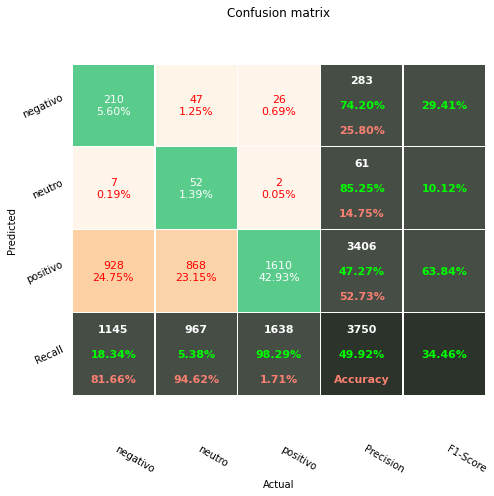

In [58]:
matriz_confusao(y_test, modelo6_pred_orig)

### Validação cruzada - modelo 6

In [59]:
validacao_cruzada6 = cross_val_predict(modelo6_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.18      0.29      4426
           1       0.82      0.06      0.11      3926
           2       0.48      0.98      0.64      6648

    accuracy                           0.50     15000
   macro avg       0.68      0.41      0.35     15000
weighted avg       0.64      0.50      0.40     15000

Acurácia: 0.5030

Matrix de confusão:
 Predito     0    1      2    All
Real                            
0         810   23   3593   4426
1         174  233   3519   3926
2         119   27   6502   6648
All      1103  283  13614  15000 


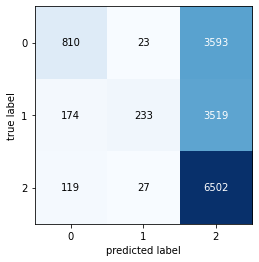

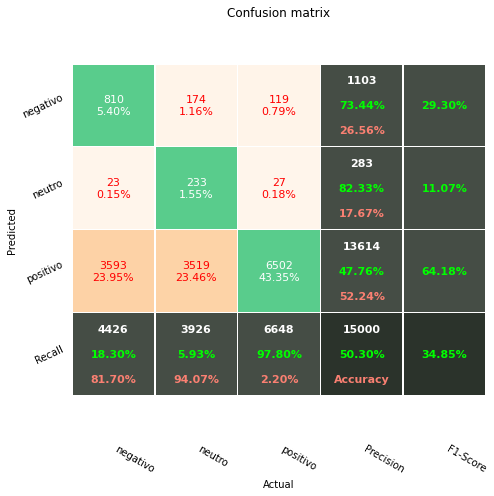

In [60]:
matriz_confusao(y, validacao_cruzada6)

## Modelo 7 (CountVectorizer e XGBClassifier)

In [61]:
modelo7_orig = escolher_pipeline(7)
modelo7_orig = modelo7_orig.fit(X_train, y_train)
modelo7_pred_orig = modelo7_orig.predict(X_text)

In [62]:
modelo7_pred_orig

array([2, 0, 2, ..., 2, 1, 2])

### Avaliando o modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.65      0.54      0.59      1145
           1       0.48      0.31      0.38       967
           2       0.62      0.83      0.71      1638

    accuracy                           0.60      3750
   macro avg       0.59      0.56      0.56      3750
weighted avg       0.59      0.60      0.59      3750

Acurácia: 0.6045

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        613  180   352  1145
1        179  302   486   967
2        145  141  1352  1638
All      937  623  2190  3750 


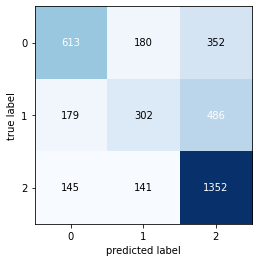

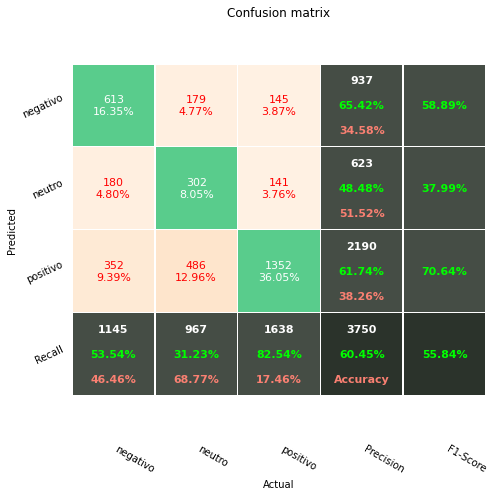

In [63]:
matriz_confusao(y_test, modelo7_pred_orig)

### Validação cruzada - modelo 7

In [64]:
validacao_cruzada7 = cross_val_predict(modelo7_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.65      0.54      0.59      4426
           1       0.50      0.33      0.40      3926
           2       0.63      0.82      0.71      6648

    accuracy                           0.61     15000
   macro avg       0.59      0.56      0.57     15000
weighted avg       0.60      0.61      0.59     15000

Acurácia: 0.6098

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2391   681  1354   4426
1         724  1298  1904   3926
2         563   627  5458   6648
All      3678  2606  8716  15000 


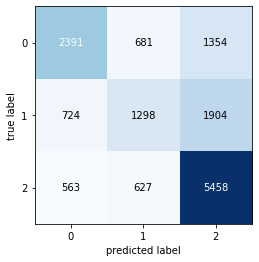

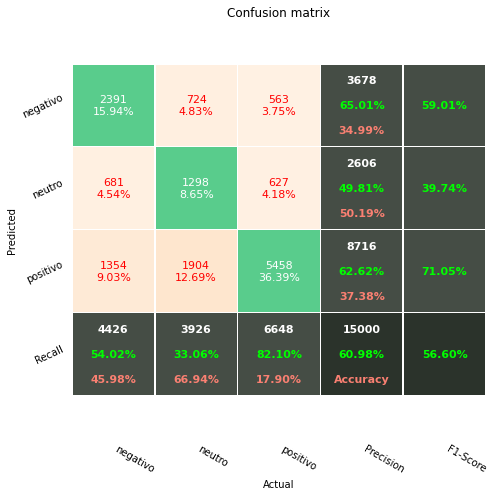

In [65]:
matriz_confusao(y, validacao_cruzada7)

## Modelo 8 (CountVectorizer e MLPClassifier)

In [66]:
modelo8_orig = escolher_pipeline(8)
modelo8_orig = modelo8_orig.fit(X_train, y_train)
modelo8_pred_orig = modelo8_orig.predict(X_text)

In [67]:
modelo8_pred_orig

array([2, 1, 2, ..., 2, 1, 0])

### Avaliando o modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.54      0.58      1145
           1       0.42      0.46      0.44       967
           2       0.69      0.71      0.70      1638

    accuracy                           0.59      3750
   macro avg       0.58      0.57      0.57      3750
weighted avg       0.60      0.59      0.59      3750

Acurácia: 0.5933

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        615   327   203  1145
1        202   448   317   967
2        176   300  1162  1638
All      993  1075  1682  3750 


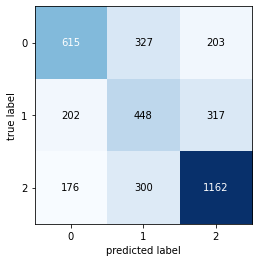

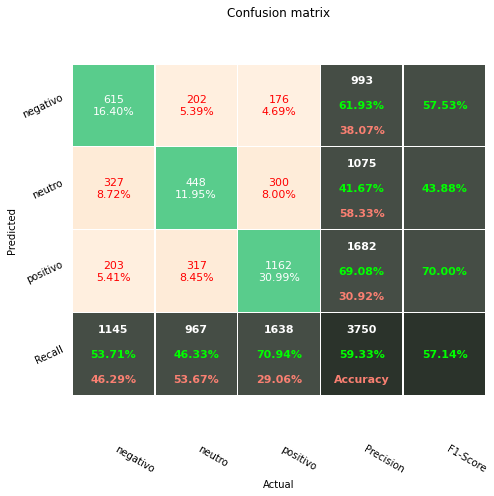

In [68]:
matriz_confusao(y_test, modelo8_pred_orig)

### Validação cruzada - modelo 8

In [69]:
validacao_cruzada8 = cross_val_predict(modelo8_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60      4426
           1       0.46      0.43      0.44      3926
           2       0.68      0.72      0.70      6648

    accuracy                           0.61     15000
   macro avg       0.58      0.58      0.58     15000
weighted avg       0.60      0.61      0.60     15000

Acurácia: 0.6055

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2648   877   901   4426
1         953  1677  1296   3926
2         800  1091  4757   6648
All      4401  3645  6954  15000 


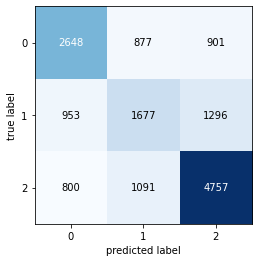

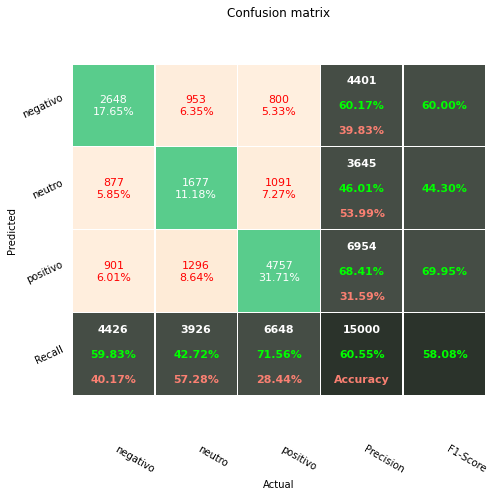

In [70]:
matriz_confusao(y, validacao_cruzada8)

## Modelo 9 (CountVectorizer e LogisticRegression)

In [71]:
modelo9_orig = escolher_pipeline(9)
modelo9_orig = modelo9_orig.fit(X_train, y_train)
modelo9_pred_orig = modelo9_orig.predict(X_text)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [72]:
modelo9_pred_orig

array([2, 0, 2, ..., 2, 1, 0])

### Avaliando o modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58      1145
           1       0.42      0.45      0.44       967
           2       0.68      0.69      0.68      1638

    accuracy                           0.59      3750
   macro avg       0.57      0.57      0.57      3750
weighted avg       0.59      0.59      0.59      3750

Acurácia: 0.5880

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         638   294   213  1145
1         208   439   320   967
2         209   301  1128  1638
All      1055  1034  1661  3750 


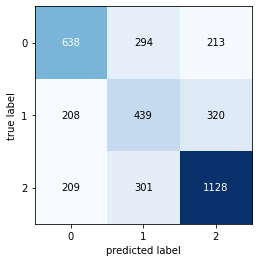

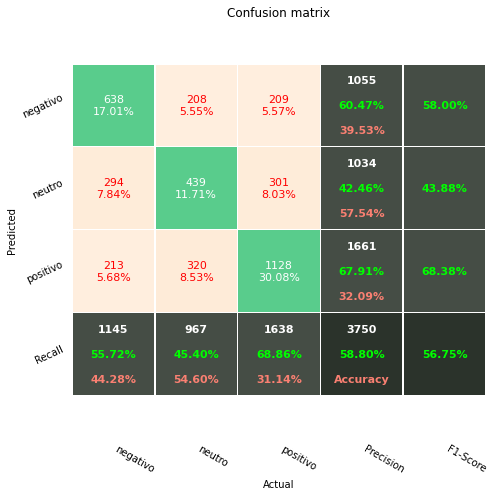

In [73]:
matriz_confusao(y_test, modelo9_pred_orig)

### Validação cruzada - modelo 9

In [74]:
validacao_cruzada9 = cross_val_predict(modelo9_orig, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59      4426
           1       0.45      0.46      0.45      3926
           2       0.69      0.70      0.69      6648

    accuracy                           0.60     15000
   macro avg       0.58      0.58      0.58     15000
weighted avg       0.60      0.60      0.60     15000

Acurácia: 0.6011

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2576  1009   841   4426
1         900  1807  1219   3926
2         782  1233  4633   6648
All      4258  4049  6693  15000 


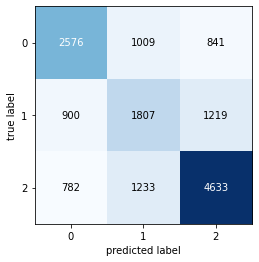

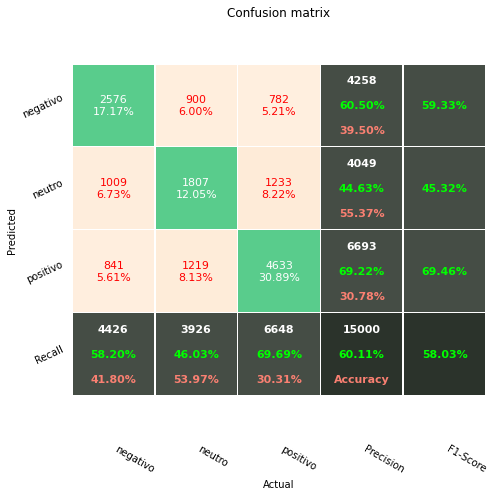

In [75]:
matriz_confusao(y, validacao_cruzada9)

## Modelo 10 (CountVectorizer e SVC)

In [76]:
modelo10_orig = escolher_pipeline(10)
modelo10_orig = modelo10_orig.fit(X_train, y_train)
modelo10_pred_orig = modelo10_orig.predict(X_text)

In [77]:
modelo10_pred_orig

array([2, 2, 2, ..., 2, 2, 2])

### Avaliando o modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.09      0.17      1145
           1       0.61      0.18      0.27       967
           2       0.47      0.95      0.63      1638

    accuracy                           0.49      3750
   macro avg       0.59      0.41      0.36      3750
weighted avg       0.57      0.49      0.40      3750

Acurácia: 0.4880

Matrix de confusão:
 Predito    0    1     2   All
Real                         
0        108   42   995  1145
1         28  171   768   967
2         19   68  1551  1638
All      155  281  3314  3750 


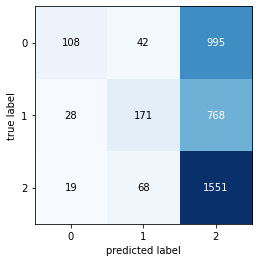

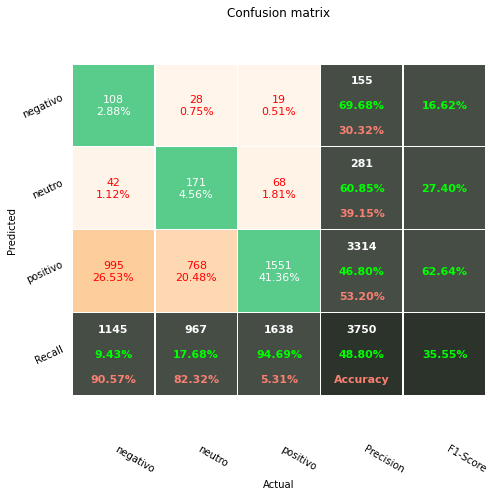

In [78]:
matriz_confusao(y_test, modelo10_pred_orig)

### Validação cruzada - modelo 10

In [79]:
validacao_cruzada10 = cross_val_predict(modelo10_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.11      0.19      4426
           1       0.57      0.16      0.25      3926
           2       0.47      0.93      0.63      6648

    accuracy                           0.49     15000
   macro avg       0.58      0.40      0.35     15000
weighted avg       0.57      0.49      0.40     15000

Acurácia: 0.4884

Matrix de confusão:
 Predito    0     1      2    All
Real                            
0        479   142   3805   4426
1        106   633   3187   3926
2         91   343   6214   6648
All      676  1118  13206  15000 


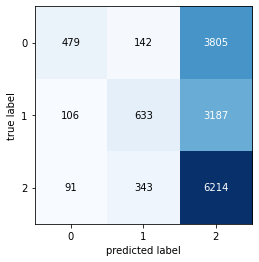

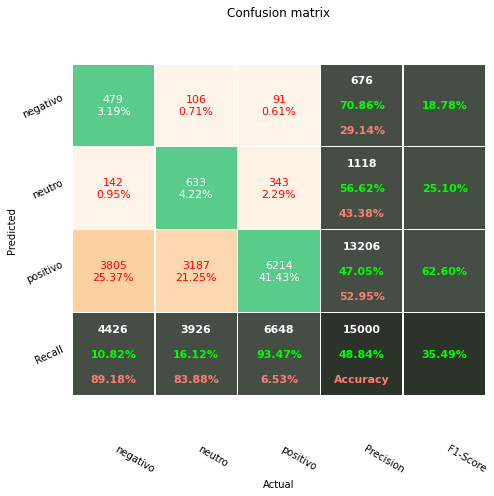

In [80]:
matriz_confusao(y, validacao_cruzada10)

## Gerando relatório dos modelos

In [81]:
# pegando o relatório de metricas dos modelos
report1 = metrics.classification_report(y_test, modelo1_pred_orig, output_dict=True)
report2 = metrics.classification_report(y_test, modelo2_pred_orig, output_dict=True)
report3 = metrics.classification_report(y_test, modelo3_pred_orig, output_dict=True)
report4 = metrics.classification_report(y_test, modelo4_pred_orig, output_dict=True)
report5 = metrics.classification_report(y_test, modelo5_pred_orig, output_dict=True)
report6 = metrics.classification_report(y_test, modelo6_pred_orig, output_dict=True)
report7 = metrics.classification_report(y_test, modelo7_pred_orig, output_dict=True)
report8 = metrics.classification_report(y_test, modelo8_pred_orig, output_dict=True)
report9 = metrics.classification_report(y_test, modelo9_pred_orig, output_dict=True)
report10 = metrics.classification_report(y_test, modelo10_pred_orig, output_dict=True)

In [93]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'prec_neg', 'prec_neu', 'prec_pos', 'rec_neg', 'rec_neu', 'rec_pos', 'f1_neg', 'f1_neu', 'f1_pos', 'f1_media', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [94]:
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy


In [95]:
# criando a lista com o modelos de classificação
modelos = ['SGD_Count',
            'MultinomialNB_Count',
            'RandomForest_Count',
            'KNeighbors_Count',
            'PassiveAggressive_Count',
            'GradientBoosting_Count',
            'XGB_Count',
            'MLP_Count',
            'LogisticRegression_Count',
            'SVC_Count']

In [85]:
# criando a lista com os relatórios individuais
reports = [report1, 
            report2,
            report3,
            report4,
            report5,
            report6,
            report7,
            report8,
            report9,
            report10]

In [96]:
# loop para criação do relátorio consolidado
for i in range(len(modelos)):
    report_df.loc[i] = [modelos[i], 
                    round(reports[i]['0']['precision'], 2), 
                    round(reports[i]['1']['precision'], 2),
                    round(reports[i]['2']['precision'], 2),
                    round(reports[i]['0']['recall'], 2),
                    round(reports[i]['1']['recall'], 2),
                    round(reports[i]['2']['recall'], 2),
                    round(reports[i]['0']['f1-score'], 2),
                    round(reports[i]['1']['f1-score'], 2),
                    round(reports[i]['2']['f1-score'], 2),
                    round(reports[i]['macro avg']['f1-score'],2),
                    round(reports[i]['accuracy'], 2)] 

In [103]:
report_df.sort_values(by='f1_media', ascending=False, inplace=True)
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy
2,RandomForest_Count,0.61,0.45,0.68,0.58,0.50,0.66,0.59,0.48,0.67,0.58,0.59
0,SGD_Count,0.61,0.42,0.68,0.56,0.43,0.72,0.58,0.42,0.70,0.57,0.60
1,MultinomialNB_Count,0.59,0.47,0.67,0.65,0.33,0.75,0.62,0.39,0.71,0.57,0.61
4,PassiveAggressive_Count,0.62,0.42,0.69,0.56,0.45,0.71,0.59,0.44,0.70,0.57,0.60
7,MLP_Count,0.62,0.42,0.69,0.54,0.46,0.71,0.58,0.44,0.70,0.57,0.59
8,LogisticRegression_Count,0.60,0.42,0.68,0.56,0.45,0.69,0.58,0.44,0.68,0.57,0.59
6,XGB_Count,0.65,0.48,0.62,0.54,0.31,0.83,0.59,0.38,0.71,0.56,0.60
3,KNeighbors_Count,0.59,0.36,0.55,0.34,0.40,0.68,0.43,0.38,0.61,0.47,0.50
9,SVC_Count,0.70,0.61,0.47,0.09,0.18,0.95,0.17,0.27,0.63,0.36,0.49
5,GradientBoosting_Count,0.74,0.85,0.47,0.18,0.05,0.98,0.29,0.10,0.64,0.34,0.50


In [104]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
# salvando o relatório consolidado em excel
report_df.to_excel("repost_original_count.xlsx")